### 1. Импортирование библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

plt.style.use("seaborn")

### 2. Выполнение лабораторной работы №2. Часть 1

#### Задание 3.

##### 1) Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
train_validation, test = train_test_split(df, test_size = 0.2)
train_validation.shape, test.shape

((16512, 10), (4128, 10))

In [4]:
train, validation = train_test_split(train_validation, test_size = 0.2)
train.shape, validation.shape

((13209, 10), (3303, 10))

##### 2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [5]:
train = pd.get_dummies(train, columns=["ocean_proximity"])
validation = pd.get_dummies(validation, columns=["ocean_proximity"])
test = pd.get_dummies(test, columns=["ocean_proximity"])

##### 3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [6]:
train["average_rooms"] = train["total_rooms"] / train["households"]
train["average_bedrooms"] = train["total_bedrooms"] / train["households"]

validation["average_rooms"] = validation["total_rooms"] / validation["households"]
validation["average_bedrooms"] = validation["total_bedrooms"] / validation["households"]

test["average_rooms"] = test["total_rooms"] / test["households"]
test["average_bedrooms"] = test["total_bedrooms"] / test["households"]

##### 4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [7]:
train.isna().sum(), validation.isna().sum(), test.isna().sum()

(longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                131
 population                      0
 households                      0
 median_income                   0
 median_house_value              0
 ocean_proximity_<1H OCEAN       0
 ocean_proximity_INLAND          0
 ocean_proximity_ISLAND          0
 ocean_proximity_NEAR BAY        0
 ocean_proximity_NEAR OCEAN      0
 average_rooms                   0
 average_bedrooms              131
 dtype: int64,
 longitude                      0
 latitude                       0
 housing_median_age             0
 total_rooms                    0
 total_bedrooms                35
 population                     0
 households                     0
 median_income                  0
 median_house_value             0
 ocean_proximity_<1H OCEAN      0
 ocean_proximity_INLAND         0
 ocean_proximity_ISLAND         0
 ocean_proximity_

In [8]:
mean_value = train["average_bedrooms"].mean()

In [9]:
train.fillna(value = mean_value, inplace=True)
test.fillna(value = mean_value, inplace = True)
validation.fillna(value = mean_value, inplace=True)

##### 5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [10]:
train["longitude"] = (train["longitude"] - train["longitude"].mean()) / train["longitude"].std()
train["latitude"] = (train["latitude"] - train["latitude"].mean()) / train["latitude"].std()

validation["longitude"] = (validation["longitude"] - validation["longitude"].mean()) / validation["longitude"].std()
validation["latitude"] = (validation["latitude"] - validation["latitude"].mean()) / validation["latitude"].std()

test["longitude"] = (test["longitude"] - test["longitude"].mean()) / test["longitude"].std()
test["latitude"] = (test["latitude"] - test["latitude"].mean()) / test["latitude"].std()

### 3. Выполнение лабораторной работы №2. Часть 2

#### Задание 1.

In [11]:
df = pd.read_csv("Davis.csv")
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [12]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


##### 1) Удалите некорректные данные

In [13]:
df.isna().sum() / len(df) * 100

sex       0.0
weight    0.0
height    0.0
repwt     8.5
repht     8.5
dtype: float64

In [14]:
df.drop(["repwt", "repht"], axis=1)

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157
...,...,...,...
195,M,74,175
196,M,83,180
197,M,81,175
198,M,90,181


In [15]:
df = df[np.logical_and(df['height'] > 100, df['weвight'] < 150)]

##### 2) Выделите тестовую выборку из 50 экземпляров

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df, test_size=50)
train.shape, test.shape

((149, 5), (50, 5))

##### 3) На тренировочных данных постройте: Гистограмму height, Гистограмму weight, Эти же гистограммы для разных полов

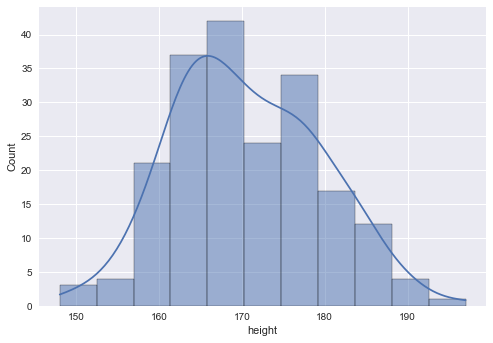

In [18]:
sns.histplot(df["height"], kde = True);

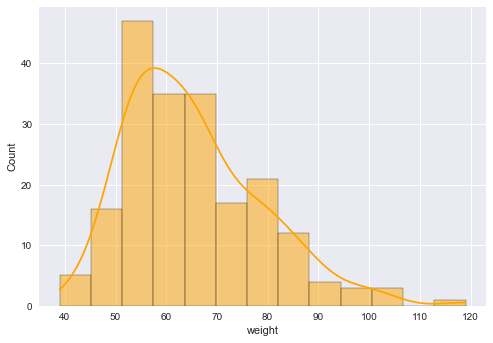

In [19]:
sns.histplot(df["weight"], kde = True, color = "orange");

In [20]:
df_men = df[df["sex"] == 'M']
df_women = df[df["sex"] == 'F']

df_men.head(), df_women.head()

(  sex  weight  height  repwt  repht
 0   M      77     182   77.0  180.0
 3   M      68     177   70.0  175.0
 5   M      76     170   76.0  165.0
 6   M      76     167   77.0  165.0
 7   M      69     186   73.0  180.0,
    sex  weight  height  repwt  repht
 1    F      58     161   51.0  159.0
 2    F      53     161   54.0  158.0
 4    F      59     157   59.0  155.0
 12   F      51     161   52.0  158.0
 13   F      64     168   64.0  165.0)

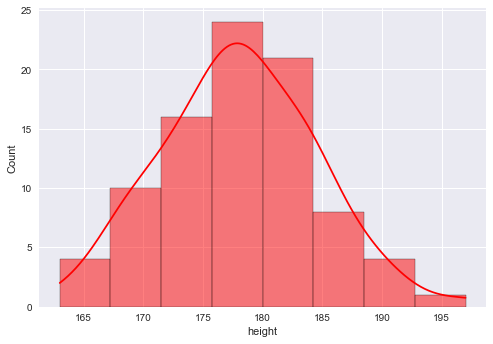

In [21]:
sns.histplot(df_men['height'], kde = True, color = "red");

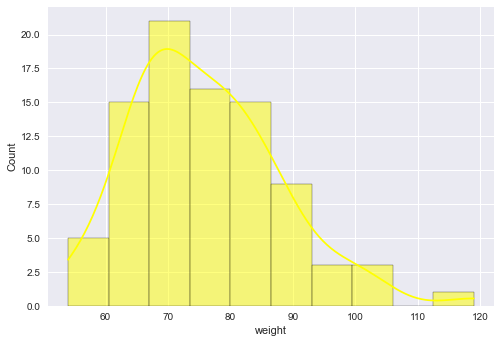

In [22]:
sns.histplot(df_men["weight"], kde = True, color = "yellow");

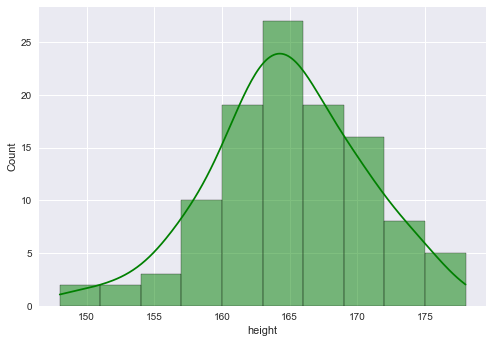

In [23]:
sns.histplot(df_women["height"], kde = True, color = "green");

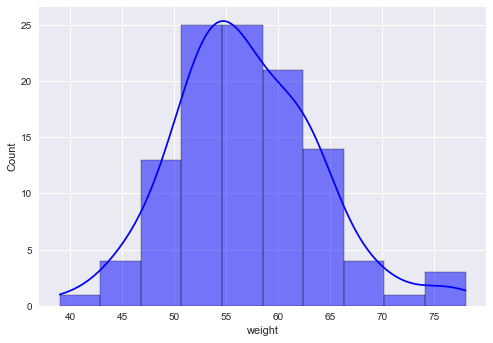

In [24]:
sns.histplot(df_women["weight"], kde = True, color = "blue");

##### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

train.head(), test.head()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(     sex  weight  height  repwt  repht
 116    0      83     184   83.0  181.0
 77     1      63     160   64.0  158.0
 148    1      70     173   67.0  170.0
 151    1      47     162   47.0  160.0
 152    1      47     150   45.0  152.0,
      sex  weight  height  repwt  repht
 79     0      69     183   70.0  183.0
 10     0      70     175   75.0  174.0
 141    1      52     163   53.0  160.0
 54     0      64     177    NaN    NaN
 179    0      68     174   68.0  173.0)

In [27]:
y_train = train["sex"].to_numpy()
X_train = train.loc[:, ["height", "weight"]].to_numpy()

In [28]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_train, y_train) # Обучающая выборка

0.8926174496644296

In [29]:
y_test = test["sex"].to_numpy()
X_test = test.loc[:, ["height", "weight"]].to_numpy()
clf.score(X_test, y_test) # Тестовая выборка

0.96

##### 5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке

In [30]:
predicts = clf.predict(X_train)

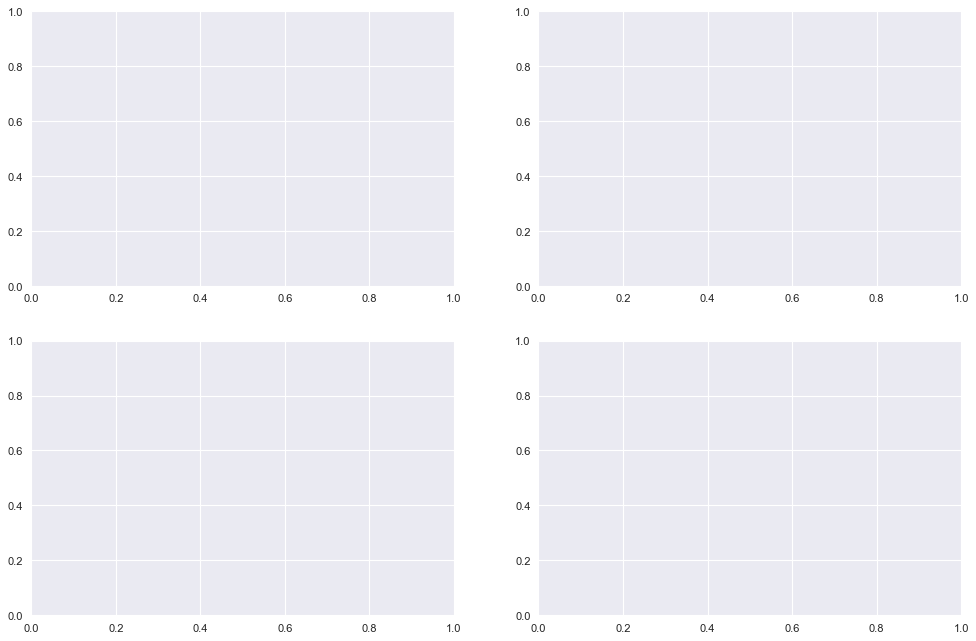

In [31]:
fig = plt.figure(figsize=(15, 10), dpi=80)

ax_1 = fig.add_subplot(2, 2, 1);
ax_2 = fig.add_subplot(2, 2, 2);
ax_3 = fig.add_subplot(2, 2, 3);
ax_4 = fig.add_subplot(2, 2, 4);

In [32]:
x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 1].max()+0.5
x2_min, x2_max = X_train[:, 0].min() - 0.5, X_train[:, 1].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)

ax_3.scatter(X_train[predicts == 0][:, 0], X_train[predicts == 0][:, 1], color='blue', label='M')
ax_3.scatter(X_train[predicts == 1][:, 0], X_train[predicts == 1][:, 1], color='red', label='F')
ax_3.set_ylabel('weight')
ax_3.set_xlabel('height')
ax_3.set_title('Тренировочная выборка')
ax_3.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap=ListedColormap(['blue', 'red']), alpha=0.3, shading='auto')
ax_3.legend()

x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 1].max()+0.5
x2_min, x2_max = X_test[:, 0].min() - 0.5, X_test[:, 1].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)

predicts = clf.predict(X_test)
ax_4.scatter(X_test[predicts == 0][:, 0], X_test[predicts == 0][:, 1], color='blue', label='M')
ax_4.scatter(X_test[predicts == 1][:, 0], X_test[predicts == 1][:, 1], color='red', label='F')
ax_4.set_ylabel('weight')
ax_4.set_xlabel('height')
ax_4.set_title('Тестовая выборка')
ax_4.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap=ListedColormap(['blue', 'red']), alpha=0.3, shading='auto')
ax_4.legend()

#### Задание 2.

##### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [33]:
df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [34]:
train_validation, test = train_test_split(df, test_size = 0.2)
train, validation = train_test_split(train_validation, test_size = 0.2)

train.shape, validation.shape, test.shape

((6123, 5), (1531, 5), (1914, 5))

##### 2) Постройте регрессионную модель.  Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
y_train = train["PE"].to_numpy()
X_train = train.drop(["PE"], axis=1).to_numpy()

y_val = validation["PE"].to_numpy()
X_val = validation.drop(["PE"], axis=1).to_numpy()

y_test = test["PE"].to_numpy()
X_test = test.drop(["PE"], axis=1).to_numpy()

In [37]:
linear = LinearRegression().fit(X_val, y_val)
print(linear.score(X_val, y_val)) # R^2

predictions_val = linear.predict(X_val)
np.sqrt(mean_squared_error(predictions_val, y_val)) # MSE

0.9306568617306817


4.480135880588443

##### 3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 

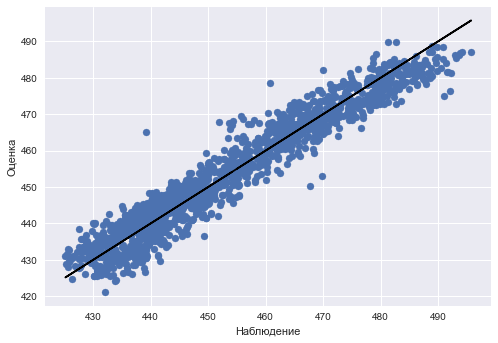

In [38]:
plt.scatter(y_val, predictions_val)
plt.plot(y_val, y_val, color = 'k')
plt.xlabel("Наблюдение");
plt.ylabel("Оценка");